# Market Basket analysis

(reference 1)[https://medium.com/geekculture/predicting-purchases-with-market-basket-analysis-d6ad2152bf6e]

(reference 2)[https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce]

(reference 3)[https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/]

(dataset)[https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis/]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('Assignment-1_Data.xlsx')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [6]:
df.describe()

,Quantity,Date,Price,CustomerID
count,522064.000000,522064,522064.000000,388023.000000
mean,10.090435,2011-07-04 12:51:20.777107456,3.826801,15316.931710
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:15:00,1.250000,13950.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15265.000000
75%,10.000000,2011-10-19 14:12:00,4.130000,16837.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.110525,NaN,41.900599,1721.846964


In [7]:
df.isnull().sum() / len(df) * 100

BillNo         0.000000
Itemname       0.278701
Quantity       0.000000
Date           0.000000
Price          0.000000
CustomerID    25.675205
Country        0.000000
dtype: float64

In [8]:
df.loc[df['Price'] == 0]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1937,536545,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1938,536546,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1939,536547,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1940,536549,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...
517266,581234,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
518770,581406,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
518771,581406,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
518820,581408,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [9]:
df = df.loc[df['Price'] > 0]

In [10]:
df = df.loc[(df['Itemname']!='POSTAGE')&(df['Itemname']!='DOTCOM POSTAGE')&(df['Itemname']!='Adjust bad debt')&(df['Itemname']!='Manual')]

In [11]:
df.isnull().sum() / len(df) * 100

BillNo         0.000000
Itemname       0.000000
Quantity       0.000000
Date           0.000000
Price          0.000000
CustomerID    25.279828
Country        0.000000
dtype: float64

In [12]:
df.loc[df['CustomerID'].isnull()].head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
1410,536544,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1411,536544,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1412,536544,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1413,536544,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1414,536544,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [13]:
# CustomerID is an important feature and can't be dropped.
# We can do mode imputation, but that will disturb the results
# Duplicating previous values also wont work because the null rows are continous

df = df.fillna('00000')
df.isnull().sum() / len(df) * 100

BillNo        0.0
Itemname      0.0
Quantity      0.0
Date          0.0
Price         0.0
CustomerID    0.0
Country       0.0
dtype: float64

In [14]:
# Datetime Feature engineering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Datetime'] = df['Date']
df['Date'] = df['Datetime'].dt.date
df = df.loc[df['Year']!=2010]

In [15]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Datetime
41242,539993,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00
41243,539993,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00
41244,539993,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00
41245,539993,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00
41246,539993,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00


In [16]:
df['Total'] = df['Quantity'] * df['Price']
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Datetime,Total
41242,539993,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00,19.5
41243,539993,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00,10.5
41244,539993,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00,10.5
41245,539993,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00,10.5
41246,539993,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313.0,United Kingdom,2011,1,2011-01-04 10:00:00,12.5


# EDA

In [17]:
print(df.groupby(['Month'])['Total'].sum().sort_values())

Month
2      490058.230
4      507366.971
12     606953.650
7      642528.481
1      648311.120
3      659979.660
8      701411.420
6      710158.020
5      721789.800
9      981408.102
10    1072317.070
11    1421055.630
Name: Total, dtype: float64


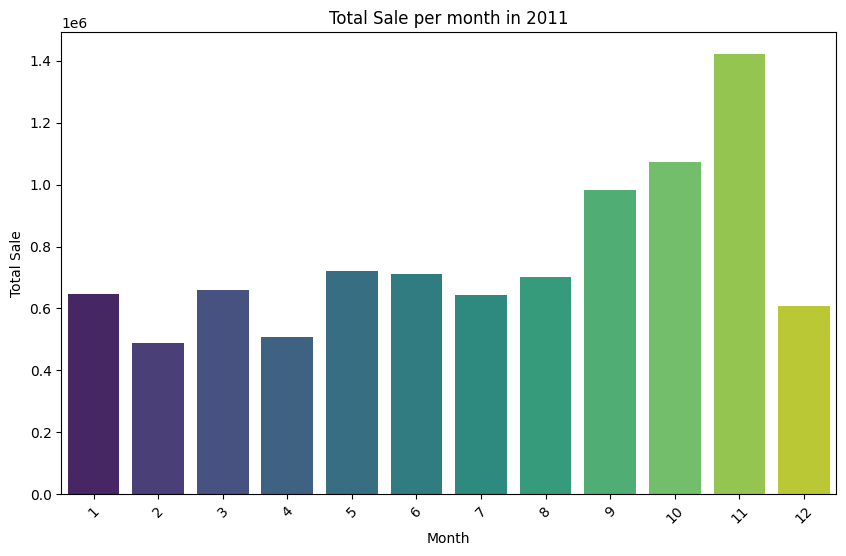

In [19]:
# Total Sale for each month

Total_Sale = (df.groupby(['Month'])['Total'].sum())
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=Total_Sale.index, y=Total_Sale.values, palette='viridis')
plt.title('Total Sale per month in 2011')
plt.xlabel('Month')
plt.ylabel('Total Sale')
plt.xticks(rotation=45)  
plt.show()

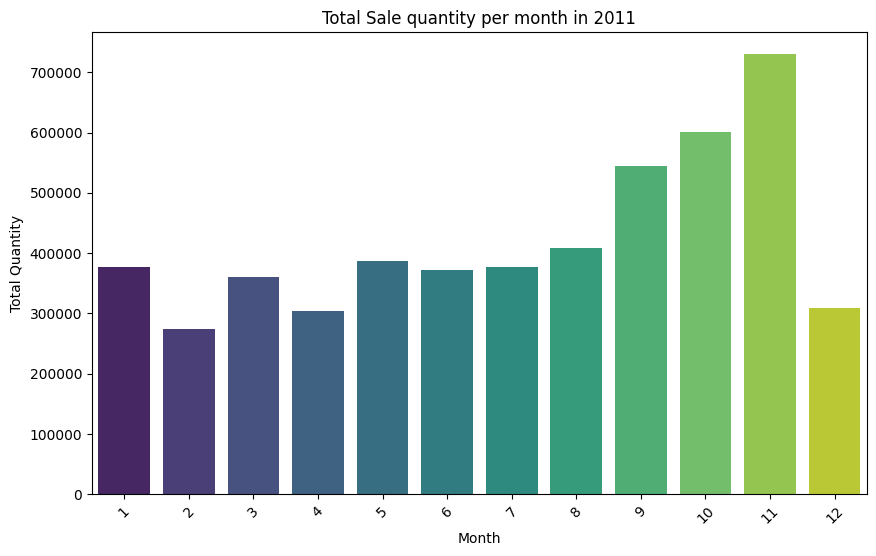

In [22]:
Total_quant = (df.groupby(['Month'])['Quantity'].sum())
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=Total_quant.index, y=Total_quant.values, palette='viridis')
plt.title('Total Sale quantity per month in 2011')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)  
plt.show()

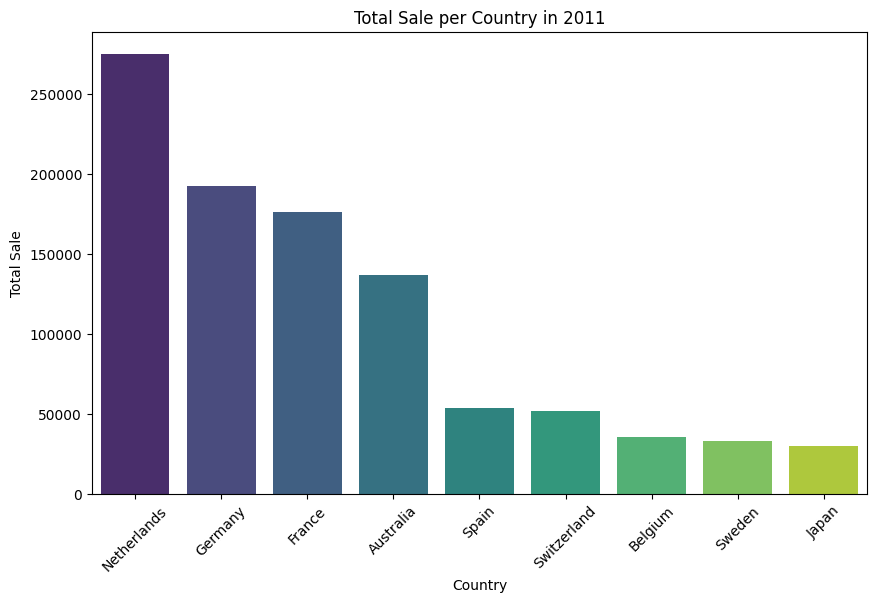

In [34]:
# Total Sale for each month UK wasn't displayed

Total_Sale_country = (df.groupby(['Country'])['Total'].sum()).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=Total_Sale_country[1:10].index, y=Total_Sale_country[1:10].values, palette='viridis')
plt.title('Total Sale per Country in 2011')
plt.xlabel('Country')
plt.ylabel('Total Sale')
plt.xticks(rotation=45)  
plt.show()

In [43]:
bill_totals = df.groupby('BillNo')['Total'].sum().reset_index()
bill_totals = bill_totals.merge(df[['BillNo', 'Country']].drop_duplicates(), on='BillNo')
average_bill_value = bill_totals.groupby('Country')['Total'].mean().sort_values(ascending=False).reset_index()

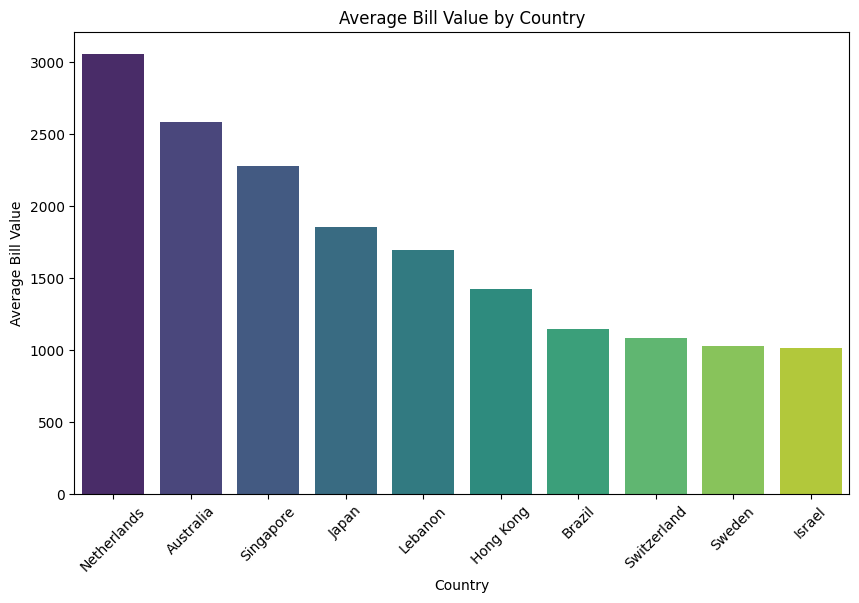

In [47]:

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=average_bill_value['Country'][:10], y=average_bill_value['Total'][:10].values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Average Bill Value')
plt.title('Average Bill Value by Country')
plt.xticks(rotation=45)
plt.show()

In [66]:
bill_total_quant = df.groupby('BillNo')['Quantity'].sum().reset_index()
bill_total_quant = bill_total_quant.merge(df[['BillNo', 'Country']].drop_duplicates(), on='BillNo')
average_bill_quant = bill_total_quant.groupby('Country')['Quantity'].mean().astype(int).sort_values(ascending=False).reset_index()

In [67]:
print(average_bill_quant)

                 Country  Quantity
0            Netherlands      2149
1              Australia      1574
2                  Japan      1370
3              Singapore      1308
4                 Sweden      1002
5              Hong Kong       681
6            Switzerland       621
7                 Israel       551
8                 Norway       523
9                    USA       491
10  United Arab Emirates       490
11               Lebanon       386
12               Iceland       356
13                Brazil       356
14                   RSA       351
15              Portugal       345
16                 Spain       319
17                Greece       310
18               Austria       299
19                France       293
20               Germany       269
21        United Kingdom       263
22           Unspecified       253
23                 Italy       235
24               Belgium       228
25                Poland       196
26                 Malta       191
27               Bah

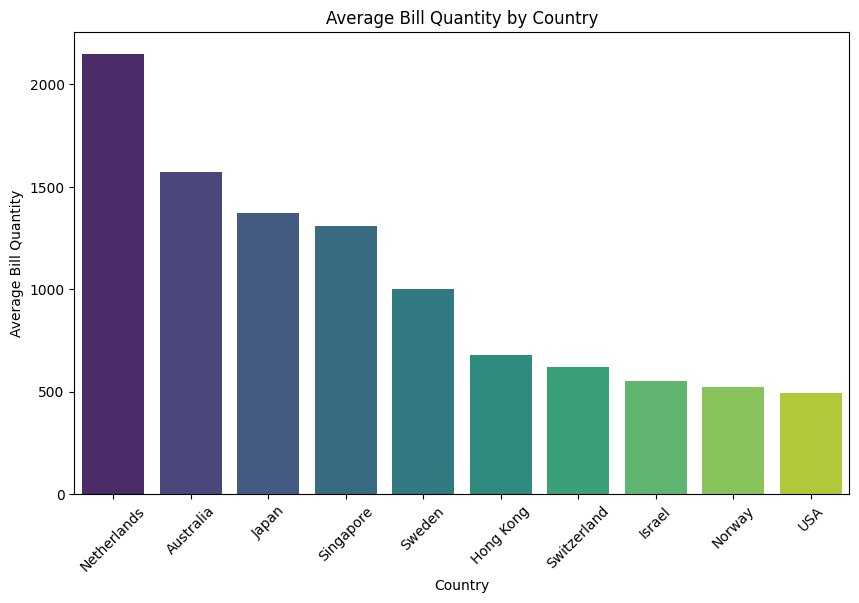

In [69]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=average_bill_quant['Country'][:10], y=average_bill_quant['Quantity'][:10].values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Average Bill Quantity')
plt.title('Average Bill Quantity by Country')
plt.xticks(rotation=45)
plt.show()

In [82]:
total_number_bills = df.groupby('Country')['BillNo'].nunique().sort_values(ascending=False)
print(total_number_bills)

Country
United Kingdom          16474
Germany                   414
France                    362
Belgium                    93
Netherlands                90
Spain                      84
Australia                  53
Switzerland                48
Portugal                   44
Italy                      33
Sweden                     32
Norway                     30
Poland                     18
Japan                      16
Austria                    16
Unspecified                13
Israel                      8
Hong Kong                   7
Iceland                     6
Greece                      5
USA                         5
Malta                       5
Singapore                   4
United Arab Emirates        2
Bahrain                     2
Lebanon                     1
RSA                         1
Saudi Arabia                1
Brazil                      1
Name: BillNo, dtype: int64


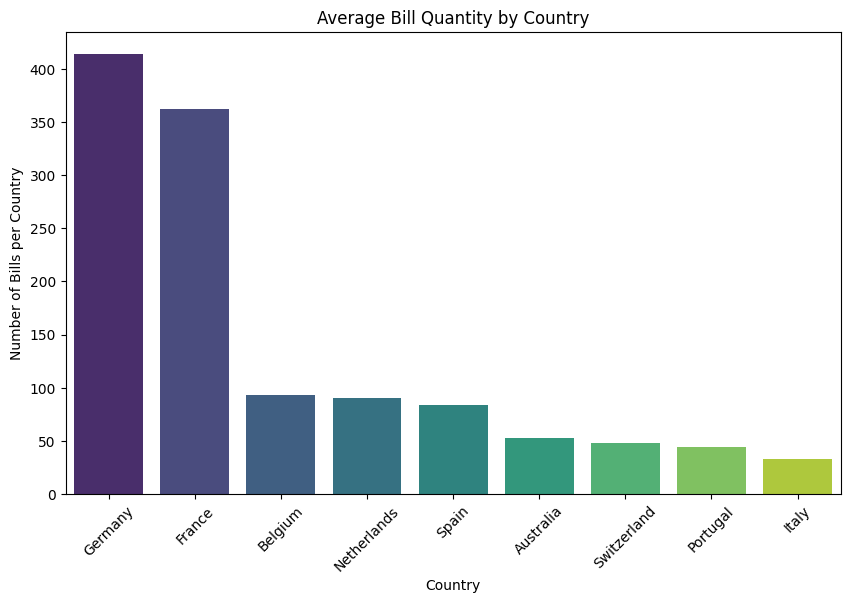

In [85]:
#UK wasn't displayed
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=total_number_bills.index[1:10], y=total_number_bills[1:10].values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Bills per Country')
plt.title('Average Bill Quantity by Country')
plt.xticks(rotation=45)
plt.show()

In [86]:
df.to_csv('cleaned.csv')